### Extracting insights for spanish papers on cancer from 2015 to 2021:

In [1]:
#import modules
import csv
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#load file created with pymed module:
pickle_file_2015_2020 = open('../article_dict_2015_2020_cancer.pickle',"rb")
cancer_2015_2020 = pickle.load(pickle_file_2015_2020)


pickle_file_2000_2015 = open('article_dict_2000_2015_cancer_2.pickle',"rb")
cancer_2000_2015 = pickle.load(pickle_file_2000_2015)

#create df:
cancer_2015_2020 = pd.DataFrame.from_dict(cancer_2015_2020)
cancer_2000_2015 = pd.DataFrame.from_dict(cancer_2000_2015)

#concatenate dfs
cancer_2000_2020= pd.concat([cancer_2015_2020, cancer_2000_2015], axis=0, ignore_index=True)

In [3]:
cancer_2000_2020.head()


,pubmed_id,title,doi,publication_date,authors
0,33585238,Biological and Mechanical Synergies to Deal Wi...,10.3389/fonc.2020.613669,2021-02-16,"[{'lastname': 'Mazal', 'firstname': 'Alejandro..."
1,33585233,Minimal Residual Disease Detection by Next-Gen...,10.3389/fonc.2020.611021,2021-02-16,"[{'lastname': 'Yao', 'firstname': 'Qiumei', 'i..."
2,33584915,Design and Simulation of Microfluidic Device f...,10.2478/joeb-2018-0003,2018-08-16,"[{'lastname': 'Asif', 'firstname': 'Afia', 'in..."
3,33584653,Proceedings From the First International Works...,10.3389/fimmu.2020.589381,2021-02-16,"[{'lastname': 'Guerrouahen', 'firstname': 'Bel..."
4,33579457,Liposomes embedded in layer by layer construct...,10.1016/j.msec.2020.111813,2021-02-14,"[{'lastname': 'Domínguez-Arca', 'firstname': '..."


In [4]:
len(cancer_2000_2020)

62386

In [5]:
type(cancer_2000_2020)

pandas.core.frame.DataFrame

In [6]:
#count duplicates:
cancer_2000_2020.duplicated(subset=['pubmed_id']).sum()

5006

In [7]:
#remove duplicates
cancer_2000_2020.drop_duplicates(subset=['pubmed_id'],inplace=True)


In [8]:
len(cancer_2000_2020)

57380

In [9]:
#there are some missing DOIs. But I have the pubmed_id for all. Keep the rows with incomplete data.
cancer_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57380 entries, 0 to 62385
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   pubmed_id         57380 non-null  object
 1   title             57380 non-null  object
 2   doi               55108 non-null  object
 3   publication_date  57380 non-null  object
 4   authors           57380 non-null  object
dtypes: object(5)
memory usage: 2.6+ MB


In [10]:
#add a new column with the number of authors:

def get_len(x):
    return len(x)

cancer_2000_2020["num_authors"]=cancer_2000_2020["authors"].apply(get_len)



In [11]:
cancer_2000_2020.head()

,pubmed_id,title,doi,publication_date,authors,num_authors
0,33585238,Biological and Mechanical Synergies to Deal Wi...,10.3389/fonc.2020.613669,2021-02-16,"[{'lastname': 'Mazal', 'firstname': 'Alejandro...",19
1,33585233,Minimal Residual Disease Detection by Next-Gen...,10.3389/fonc.2020.611021,2021-02-16,"[{'lastname': 'Yao', 'firstname': 'Qiumei', 'i...",6
2,33584915,Design and Simulation of Microfluidic Device f...,10.2478/joeb-2018-0003,2018-08-16,"[{'lastname': 'Asif', 'firstname': 'Afia', 'in...",4
3,33584653,Proceedings From the First International Works...,10.3389/fimmu.2020.589381,2021-02-16,"[{'lastname': 'Guerrouahen', 'firstname': 'Bel...",18
4,33579457,Liposomes embedded in layer by layer construct...,10.1016/j.msec.2020.111813,2021-02-14,"[{'lastname': 'Domínguez-Arca', 'firstname': '...",7


In [12]:
#convert the data column to datatype, to extract years and month:

In [13]:
cancer_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57380 entries, 0 to 62385
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   pubmed_id         57380 non-null  object
 1   title             57380 non-null  object
 2   doi               55108 non-null  object
 3   publication_date  57380 non-null  object
 4   authors           57380 non-null  object
 5   num_authors       57380 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 3.1+ MB


In [14]:
cancer_2000_2020['publication_date']= pd.to_datetime(cancer_2000_2020['publication_date'])

In [15]:
#add columns for year and month
cancer_2000_2020["month"] = cancer_2000_2020["publication_date"].dt.month
cancer_2000_2020["year"] = cancer_2000_2020["publication_date"].dt.year

In [16]:
cancer_2000_2020.head()

,pubmed_id,title,doi,publication_date,authors,num_authors,month,year
0,33585238,Biological and Mechanical Synergies to Deal Wi...,10.3389/fonc.2020.613669,2021-02-16,"[{'lastname': 'Mazal', 'firstname': 'Alejandro...",19,2,2021
1,33585233,Minimal Residual Disease Detection by Next-Gen...,10.3389/fonc.2020.611021,2021-02-16,"[{'lastname': 'Yao', 'firstname': 'Qiumei', 'i...",6,2,2021
2,33584915,Design and Simulation of Microfluidic Device f...,10.2478/joeb-2018-0003,2018-08-16,"[{'lastname': 'Asif', 'firstname': 'Afia', 'in...",4,8,2018
3,33584653,Proceedings From the First International Works...,10.3389/fimmu.2020.589381,2021-02-16,"[{'lastname': 'Guerrouahen', 'firstname': 'Bel...",18,2,2021
4,33579457,Liposomes embedded in layer by layer construct...,10.1016/j.msec.2020.111813,2021-02-14,"[{'lastname': 'Domínguez-Arca', 'firstname': '...",7,2,2021


In [17]:
cancer_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57380 entries, 0 to 62385
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pubmed_id         57380 non-null  object        
 1   title             57380 non-null  object        
 2   doi               55108 non-null  object        
 3   publication_date  57380 non-null  datetime64[ns]
 4   authors           57380 non-null  object        
 5   num_authors       57380 non-null  int64         
 6   month             57380 non-null  int64         
 7   year              57380 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 3.9+ MB


In [18]:
#create a small df for the count of papers per year.
date_counts=round(cancer_2000_2020["year"]).value_counts().reset_index()

In [19]:
#I am getting data with "2015:2020[pdat]" and "2000:2015[pdat]" , however I have some papers published before 2000. Remove these records.
date_counts

,index,year
0,2020,5886
1,2019,5490
2,2018,5124
3,2017,4842
4,2016,4595
5,2015,4263
6,2014,3716
7,2013,2618
8,2012,2476
9,2011,2288


In [20]:
#drop records previous to 2000:
cancer_2000_2020 = cancer_2000_2020[cancer_2000_2020.year >= 2000]
cancer_2000_2020.head()

,pubmed_id,title,doi,publication_date,authors,num_authors,month,year
0,33585238,Biological and Mechanical Synergies to Deal Wi...,10.3389/fonc.2020.613669,2021-02-16,"[{'lastname': 'Mazal', 'firstname': 'Alejandro...",19,2,2021
1,33585233,Minimal Residual Disease Detection by Next-Gen...,10.3389/fonc.2020.611021,2021-02-16,"[{'lastname': 'Yao', 'firstname': 'Qiumei', 'i...",6,2,2021
2,33584915,Design and Simulation of Microfluidic Device f...,10.2478/joeb-2018-0003,2018-08-16,"[{'lastname': 'Asif', 'firstname': 'Afia', 'in...",4,8,2018
3,33584653,Proceedings From the First International Works...,10.3389/fimmu.2020.589381,2021-02-16,"[{'lastname': 'Guerrouahen', 'firstname': 'Bel...",18,2,2021
4,33579457,Liposomes embedded in layer by layer construct...,10.1016/j.msec.2020.111813,2021-02-14,"[{'lastname': 'Domínguez-Arca', 'firstname': '...",7,2,2021


In [21]:
#save final dataframe in a pickle for impact factor analysis:

In [22]:
cancer_2000_2020.to_pickle("Data/cancer_2000_2020_spain.pkl")

In [23]:
# create a special df to get insights on data/year
#remove 2021 as is not a complete year
cancer_2000_2020_time = cancer_2000_2020[cancer_2000_2020.year < 2021]
year_counts=(cancer_2000_2020_time["year"]).value_counts().reset_index()


In [24]:
year_counts

,index,year
0,2020,5886
1,2019,5490
2,2018,5124
3,2017,4842
4,2016,4595
5,2015,4263
6,2014,3716
7,2013,2618
8,2012,2476
9,2011,2288


In [25]:
#change column names
year_counts.columns = ['year', 'papers_per_year']

In [26]:
year_counts.sort_values("year", inplace=True)

<AxesSubplot:xlabel='year', ylabel='papers_per_year'>

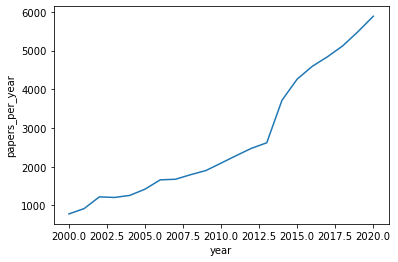

In [27]:
#papers per year.
#increase over time:
sns.lineplot(data=year_counts, x="year", y="papers_per_year")

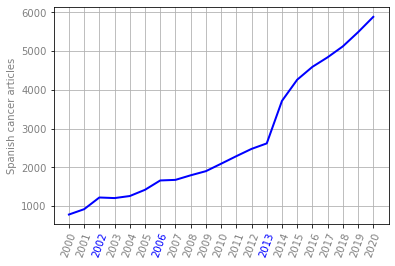

In [28]:
#papers per year.
#increase over time:
#sns.lineplot(data=year_counts, x="year", y="papers_per_year")

fig, ax = plt.subplots()
#ax=plt.gca()

ax.grid(True)
ax.set_facecolor('white')

ax.plot(year_counts["year"],year_counts["papers_per_year"], linewidth=2
            ,c="blue");

plt.xticks(range (2000,2021), year_counts["year"], color="grey",rotation=70);
plt.gca().yaxis.label.set_color('grey')
plt.gca().tick_params(axis='x', labelcolor='grey')
plt.gca().tick_params(axis='y', labelcolor='grey')
plt.gca().get_xticklabels()[2].set_color('blue')
plt.gca().get_xticklabels()[6].set_color('blue')
plt.gca().get_xticklabels()[13].set_color('blue')

#labels:
ax.set_ylabel('Spanish cancer articles');

In [29]:
#num_papers_df=cancer_2000_2020_time.groupby("year")["num_authors"].mean().reset_index()
#num_authors_df
## USE groupby aggregate.

In [30]:
num_authors_df=cancer_2000_2020_time.groupby("year")["num_authors"].mean().reset_index()
num_authors_df

,year,num_authors
0,2000,5.857875
1,2001,6.154516
2,2002,6.174447
3,2003,6.364842
4,2004,6.612391
5,2005,6.516901
6,2006,6.470801
7,2007,6.614558
8,2008,6.491639
9,2009,6.831668


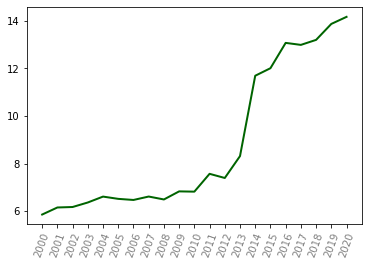

In [31]:
#plot the mean num of authors per publication per year
fig, ax = plt.subplots()
ax.plot(num_authors_df["year"],num_authors_df["num_authors"], linewidth=2
            ,c="darkgreen");
plt.xticks(range (2000,2021), year_counts["year"], color="grey",rotation=70);

In [32]:
#number of authors:
#df.groupby('A').B.agg(['min', 'max'])
cancer_authors=cancer_2000_2020.groupby("year").num_authors.agg(["mean", "min", "max","std","median"])
cancer_authors.reset_index(inplace=True)
cancer_authors


,year,mean,min,max,std,median
0,2000,5.857875,1,23,2.793129,6
1,2001,6.154516,1,27,3.443610,6
2,2002,6.174447,1,43,3.400560,6
3,2003,6.364842,1,37,3.482674,6
4,2004,6.612391,1,228,7.102522,6
5,2005,6.516901,1,46,4.033562,6
6,2006,6.470801,1,49,4.071339,6
7,2007,6.614558,1,46,3.926869,6
8,2008,6.491639,1,57,4.277099,6
9,2009,6.831668,1,141,5.723090,6


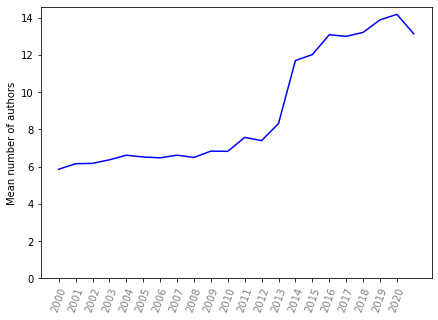

In [33]:
#plot:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)


plt.plot(cancer_authors["year"], cancer_authors["mean"], label = "num authors", color="blue")

#plt.plot(cancer_authors["year"], cancer_authors["Articles per month 2020"], label = "2020", color= "crimson")

#labels

#plt.xticks(range (1,22), month_names,rotation=70);


plt.ylabel('Mean number of authors')

plt.xticks(range (2000,2021), year_counts["year"], color="grey",rotation=70);

ax.set_ylim(ymin=0)
#ax.set_ylim(ymax=100)

#plt.title('Percentatge of articles published per month ')

#plt.legend()
plt.show();

In [34]:
cancer_authors["year"]

0     2000
1     2001
2     2002
3     2003
4     2004
5     2005
6     2006
7     2007
8     2008
9     2009
10    2010
11    2011
12    2012
13    2013
14    2014
15    2015
16    2016
17    2017
18    2018
19    2019
20    2020
21    2021
Name: year, dtype: int64

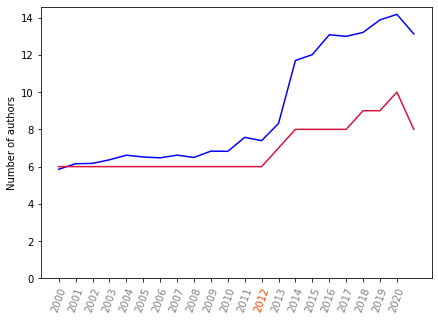

In [39]:
#plot:

fig, ax = plt.subplots(figsize=(7,5))

#ax.grid(True)

plt.plot(cancer_authors["year"], cancer_authors["mean"], label = "num authors", color="blue")
plt.plot(cancer_authors["year"], cancer_authors["median"], label = "num authors", color="crimson")


#inplot labeling:
#ax.annotate('mean', xy=(11, 7.5),color="blue")
#ax.annotate('median', xy=(16,4.5), xytext=(16,4.5), color="crimson")


#axis labels, limits and ticks:

plt.ylabel('Number of authors')

plt.xticks(range (2000,2021), year_counts["year"], color="grey",rotation=70)
plt.gca().get_xticklabels()[12].set_color('orangered')

ax.set_ylim(ymin=0)
#ax.set_ylim(ymax=100)

#plt.title('Percentatge of articles published per month ')

#plt.legend()
plt.show();

<AxesSubplot:xlabel='month', ylabel='papers_per_month'>

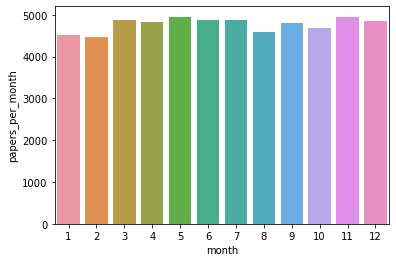

In [36]:
#for months:
month_counts=(cancer_2000_2020_time["month"]).value_counts().reset_index()
month_counts.columns = ['month', 'papers_per_month']
sns.barplot(data=month_counts, x="month", y="papers_per_month")

In [43]:
#for months:
cancer_2020_time = cancer_2000_2020[cancer_2000_2020.year ==  2020]
month_counts_2020=(cancer_2020_time["month"]).value_counts().reset_index()
month_counts_2020.columns = ['month', 'papers_per_month']
month_counts_2020.head()
month_counts_2020.sort_values("month", inplace=True)
month_counts_2020.reset_index(drop=True)
month_counts_2020['% Articles']= round((month_counts['papers_per_month']/month_counts['papers_per_month'].sum())*100,2)
month_counts_2020.head()

,month,papers_per_month,% Articles
10,1,452,7.89
9,2,466,8.00
11,3,427,7.81
6,4,488,8.42
4,5,503,8.51


Text(0, 0.5, '% articles in 2020')

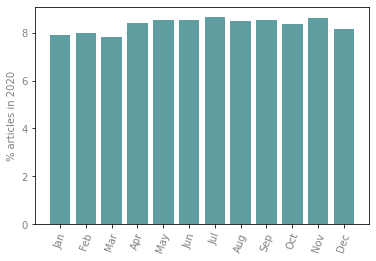

In [44]:


#papers per month on 2020:
#increase over time:
#sns.lineplot(data=year_counts, x="year", y="papers_per_year")

fig, ax = plt.subplots()
ax=plt.gca()

#plot:
ax.bar(month_counts_2020["month"],month_counts_2020["% Articles"],color=("cadetblue"));

#labels
month_names=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
plt.xticks(range (1,13), month_names, color="grey",rotation=70);
plt.gca().yaxis.label.set_color('grey')
#plt.gca().tick_params(axis='x', labelcolor='grey')
plt.gca().tick_params(axis='y', labelcolor='grey')
#plt.gca().get_xticklabels()[13].set_color('darkgreen')

#labels:
ax.set_ylabel('% articles in 2020')

In [45]:
#for months:
cancer_2000_2019_time = cancer_2000_2020[cancer_2000_2020.year <  2020]
month_counts=(cancer_2000_2019_time ["month"]).value_counts().reset_index()
month_counts.columns = ['month', 'papers_per_month']
month_counts.head()
month_counts.sort_values("month", inplace=True)
month_counts.reset_index(drop=True)
month_counts['% Articles']= round((month_counts['papers_per_month']/month_counts['papers_per_month'].sum())*100,2)
month_counts.head()

,month,papers_per_month,% Articles
10,1,4065,7.92
11,2,4004,7.80
1,3,4449,8.67
5,4,4332,8.44
0,5,4451,8.67


Text(0, 0.5, '% articles from 2000 to 2019')

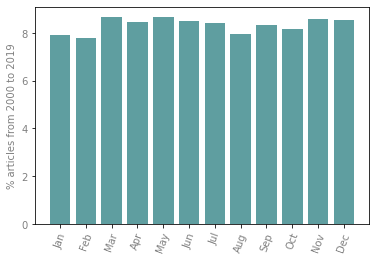

In [46]:


#papers per month.
#increase over time:
#sns.lineplot(data=year_counts, x="year", y="papers_per_year")

fig, ax = plt.subplots()
ax=plt.gca()

#plot:
ax.bar(month_counts["month"],month_counts["% Articles"],color=("cadetblue"));

#labels
month_names=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
plt.xticks(range (1,13), month_names, color="grey",rotation=70);
plt.gca().yaxis.label.set_color('grey')
#plt.gca().tick_params(axis='x', labelcolor='grey')
plt.gca().tick_params(axis='y', labelcolor='grey')
#plt.gca().get_xticklabels()[13].set_color('darkgreen')

#labels:
ax.set_ylabel('% articles from 2000 to 2019')

In [36]:

#for months 2020:
cancer_2000_time = cancer_2000_2020[cancer_2000_2020.year ==  2020]
month_counts_2020=(cancer_2000_time ["month"]).value_counts().reset_index()
month_counts_2020.columns = ['month_2020','papers_per_month_2020']
month_counts_2020.head()
month_counts_2020.sort_values("month_2020", inplace=True)
month_counts_2020.reset_index(drop=True)
month_counts_2020['Articles per month 2020']= round((month_counts_2020['papers_per_month_2020']/month_counts_2020['papers_per_month_2020'].sum())*100,2)

month_counts_2020.set_index('month_2020')
month_counts_2020.reset_index(drop=True)

,month_2020,papers_per_month_2020,Articles per month 2020
0,1,452,7.68
1,2,466,7.92
2,3,427,7.25
3,4,488,8.29
4,5,503,8.55
5,6,520,8.83
6,7,542,9.21
7,8,492,8.36
8,9,517,8.78
9,10,486,8.26


In [37]:


#for months 2000 to 2019:
cancer_2000_2019_time = cancer_2000_2020[cancer_2000_2020.year <  2020]
month_counts=(cancer_2000_2019_time ["month"]).value_counts().reset_index()
month_counts.columns = ['month','papers_per_month_2000_2019']
month_counts.head()
month_counts.sort_values("month", inplace=True)
month_counts.reset_index(drop=True)
month_counts['Articles per month 2000 to 2019']= round((month_counts['papers_per_month_2000_2019']/month_counts['papers_per_month_2000_2019'].sum())*100,2)

month_counts.set_index('month')
month_counts.reset_index(drop=True)

,month,papers_per_month_2000_2019,Articles per month 2000 to 2019
0,1,4065,7.92
1,2,4004,7.80
2,3,4449,8.67
3,4,4332,8.44
4,5,4451,8.67
5,6,4357,8.49
6,7,4329,8.43
7,8,4086,7.96
8,9,4280,8.34
9,10,4187,8.15


In [38]:
#join both tables
month_extra=month_counts.merge(month_counts_2020, left_on='month', right_on='month_2020')

In [43]:
#percentatge of papers per year per month. 
#I need to normalize the counts per the total of papers per year.

In [44]:
cancer_2000_2020.head()

,pubmed_id,title,doi,publication_date,authors,num_authors,month,year
0,33585238,Biological and Mechanical Synergies to Deal Wi...,10.3389/fonc.2020.613669,2021-02-16,"[{'lastname': 'Mazal', 'firstname': 'Alejandro...",19,2,2021
1,33585233,Minimal Residual Disease Detection by Next-Gen...,10.3389/fonc.2020.611021,2021-02-16,"[{'lastname': 'Yao', 'firstname': 'Qiumei', 'i...",6,2,2021
2,33584915,Design and Simulation of Microfluidic Device f...,10.2478/joeb-2018-0003,2018-08-16,"[{'lastname': 'Asif', 'firstname': 'Afia', 'in...",4,8,2018
3,33584653,Proceedings From the First International Works...,10.3389/fimmu.2020.589381,2021-02-16,"[{'lastname': 'Guerrouahen', 'firstname': 'Bel...",18,2,2021
4,33579457,Liposomes embedded in layer by layer construct...,10.1016/j.msec.2020.111813,2021-02-14,"[{'lastname': 'Domínguez-Arca', 'firstname': '...",7,2,2021


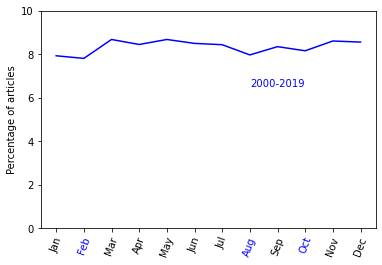

In [39]:
#plot:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(month_extra["month"], month_extra["Articles per month 2000 to 2019"], label = "2000-2019", color="blue")



#labels
month_names=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
plt.xticks(range (1,13), month_names,rotation=70);
ax.set_ylim(ymin=0)
ax.set_ylim(ymax=10)

plt.ylabel('Percentage of articles')
ax.annotate('2000-2019', xy=(2, 8), xytext=(8, 6.5),color="blue")
plt.gca().get_xticklabels()[1].set_color('blue')
plt.gca().get_xticklabels()[7].set_color('blue')
plt.gca().get_xticklabels()[9].set_color('blue')

#plt.title('Percentatge of articles published per month ')

#plt.legend()
plt.show();

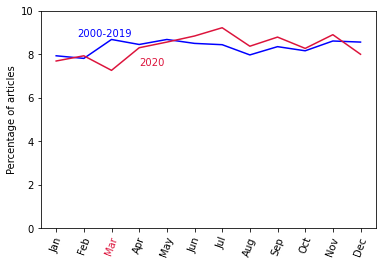

In [40]:
#plot:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(month_extra["month"], month_extra["Articles per month 2000 to 2019"], label = "2000-2019", color="blue")

plt.plot(month_extra["month"], month_extra["Articles per month 2020"], label = "2020", color= "crimson")

#labels
month_names=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
plt.xticks(range (1,13), month_names,rotation=70);


plt.ylabel('Percentage of articles')
ax.annotate('2000-2019', xy=(2, 9), xytext=(1.75, 8.80),color="blue"
            #arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.annotate('2020', xy=(3, 9), xytext=(4, 7.5), color="crimson")
plt.gca().get_xticklabels()[2].set_color('crimson')


ax.set_ylim(ymin=0)
ax.set_ylim(ymax=10)

#plt.title('Percentatge of articles published per month ')

#plt.legend()
plt.show();

<AxesSubplot:xlabel='month', ylabel='papers_per_month'>

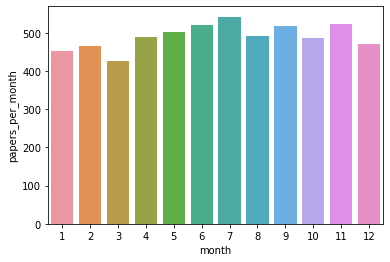

In [41]:
#for months in 2020:
cancer_2020_time = cancer_2000_2020[cancer_2000_2020.year ==  2020]
month_counts_2020=(cancer_2020_time["month"]).value_counts().reset_index()
month_counts_2020.columns = ['month', 'papers_per_month']
sns.barplot(data=month_counts_2020, x="month", y="papers_per_month")

<AxesSubplot:xlabel='month', ylabel='avg_papers_per_month'>

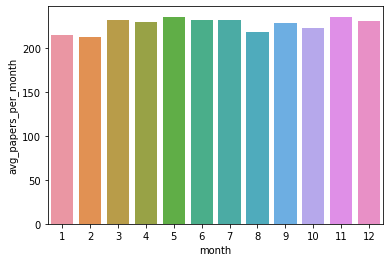

In [42]:
#avg for months:
years_used=len(cancer_2000_2020_time["year"].unique())
month_counts_2=(cancer_2000_2020_time["month"]).value_counts().reset_index()
month_counts_2.columns = ['month', 'papers_per_month']
month_counts_2["avg_papers_per_month"] = (month_counts_2['papers_per_month']/years_used)
sns.barplot(data=month_counts_2, x="month", y="avg_papers_per_month")

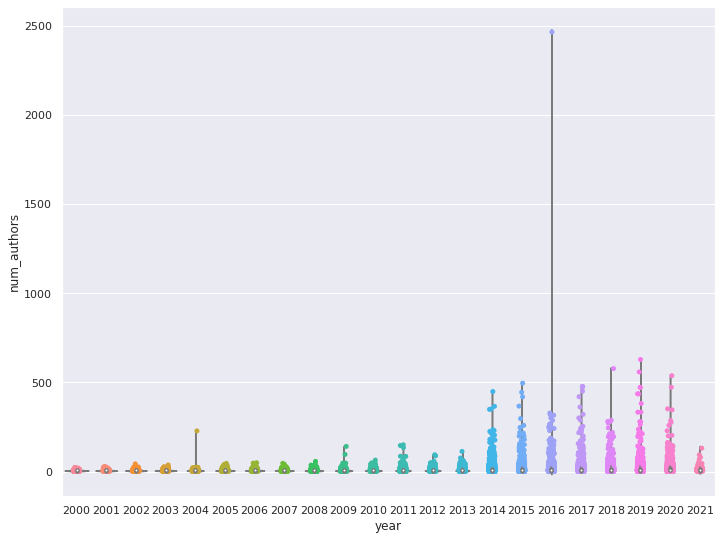

In [47]:
#violin plots: for num of authors. 
sns.set(rc={'figure.figsize':(11.7,9)})
sns.violinplot(x="year", y="num_authors", data=cancer_2000_2020, color="0.8")
sns.stripplot(x="year", y="num_authors", data=cancer_2000_2020, jitter=True, zorder=1)
plt.show()

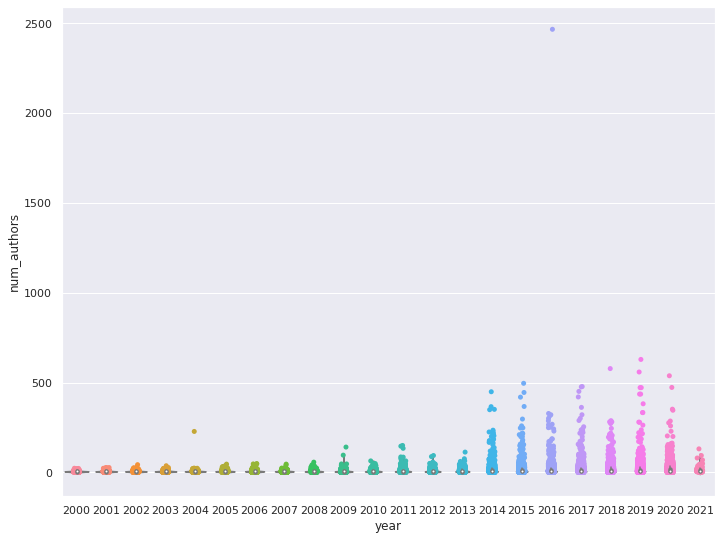

In [48]:
cancer_2000_2020_shorter_authors = cancer_2000_2020[cancer_2000_2020.num_authors <= 100]

#violin plots: for num of authors. 
sns.set(rc={'figure.figsize':(11.7,9)})
sns.violinplot(x="year", y="num_authors", data=cancer_2000_2020_shorter_authors, color="0.8")
sns.stripplot(x="year", y="num_authors", data=cancer_2000_2020, jitter=True, zorder=1)
plt.show()


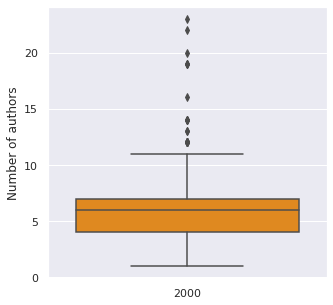

In [49]:

cancer_2000_authors = cancer_2000_2020[cancer_2000_2020.year ==2000]
plt.figure(figsize=(5, 5))

sns.boxplot(x="year",y="num_authors", data=cancer_2000_authors, color="darkorange")
plt.ylabel('Number of authors')
plt.xlabel('')
plt.show()

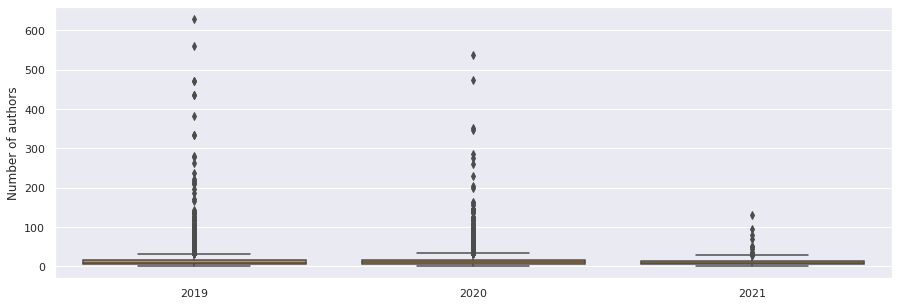

In [50]:

cancer_o2018_authors = cancer_2000_2020[cancer_2000_2020.year >2018]
plt.figure(figsize=(15, 5))

sns.boxplot(x="year",y="num_authors", data=cancer_o2018_authors, color="darkorange")
plt.ylabel('Number of authors')
plt.xlabel('')
plt.show()

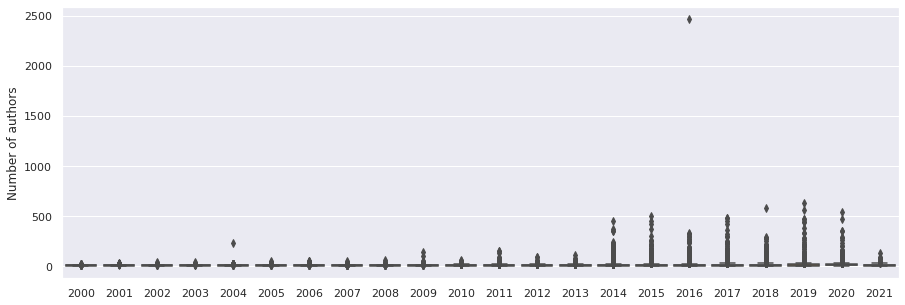

In [51]:

plt.figure(figsize=(15, 5))

sns.boxplot(x="year",y="num_authors", data=cancer_2000_2020, color="darkorange")
plt.ylabel('Number of authors')
plt.xlabel('')
plt.show()

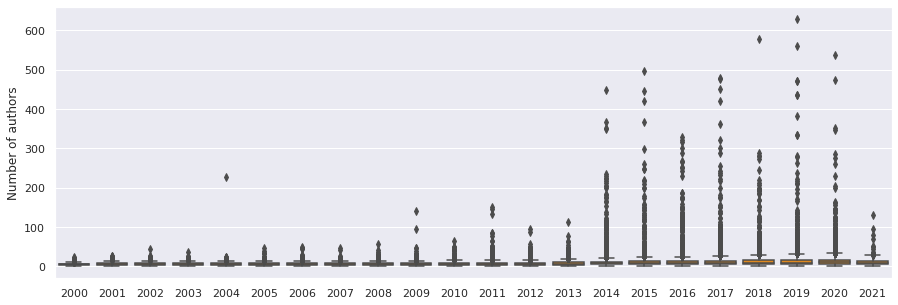

In [52]:
#cancer_o2018_authors = cancer_2000_2020[cancer_2000_2020.year >2018]
cancer_authors_shorter = cancer_2000_2020[cancer_2000_2020.num_authors <2000]
plt.figure(figsize=(15, 5))

sns.boxplot(x="year",y="num_authors", data=cancer_authors_shorter, color="darkorange")
plt.ylabel('Number of authors')
plt.xlabel('')
plt.show()

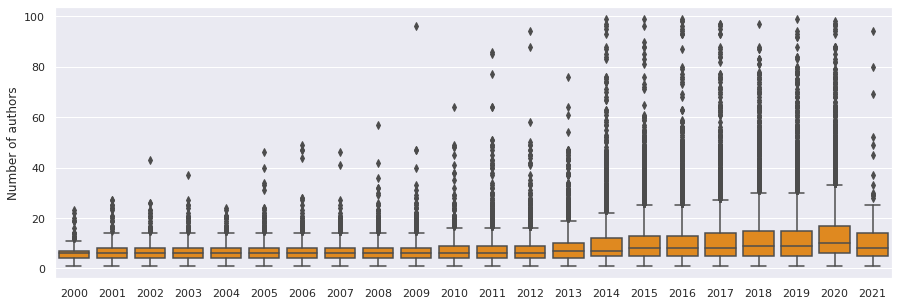

In [53]:
#cancer_o2018_authors = cancer_2000_2020[cancer_2000_2020.year >2018]
cancer_authors_shorter = cancer_2000_2020[cancer_2000_2020.num_authors <100]
plt.figure(figsize=(15, 5))

sns.boxplot(x="year",y="num_authors", data=cancer_authors_shorter, color="darkorange")
plt.ylabel('Number of authors')
plt.xlabel('')
plt.show()

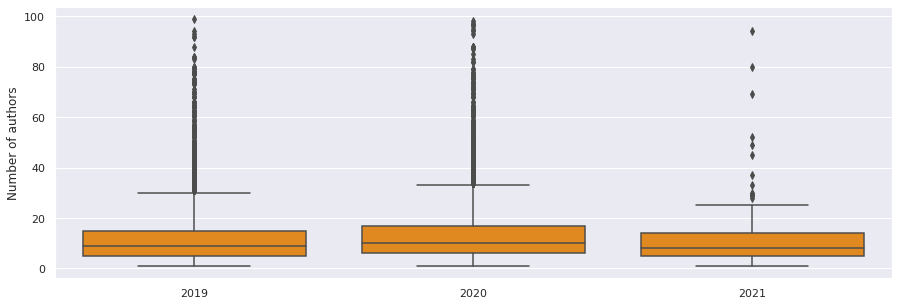

In [54]:
cancer_o2018_authors = cancer_2000_2020[cancer_2000_2020.year >2018]
cancer_o2018_authors_shorter = cancer_o2018_authors[cancer_o2018_authors.num_authors <100]
plt.figure(figsize=(15, 5))

sns.boxplot(x="year",y="num_authors", data=cancer_o2018_authors_shorter, color="darkorange")
plt.ylabel('Number of authors')
plt.xlabel('')
plt.show()

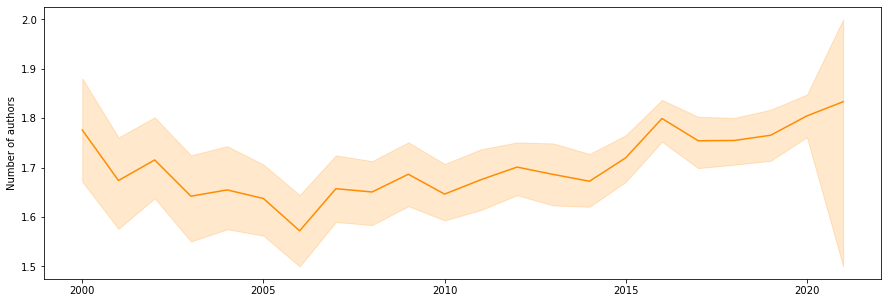

In [127]:

cancer_authors_shorter = cancer_2000_2020[cancer_2000_2020.num_authors <3]
plt.figure(figsize=(15, 5))

sns.lineplot(x="year",y="num_authors", data=cancer_authors_shorter, color="darkorange")
plt.ylabel('Number of authors')
plt.xlabel('')
plt.show()

In [56]:
few_authors = cancer_2000_2020[cancer_2000_2020.num_authors <=  3]
few_authors

,pubmed_id,title,doi,publication_date,authors,num_authors,month,year
5,33579428,Signaling pathways in hepatocellular carcinoma.,10.1016/bs.acr.2020.10.002,2021-02-14,"[{'lastname': 'Garcia-Lezana', 'firstname': 'T...",3,2,2021
6,33575258,DNA-Loaded Extracellular Vesicles in Liquid Bi...,10.3389/fcell.2020.622579,2021-02-13,"[{'lastname': 'García-Silva', 'firstname': 'Su...",3,2,2021
17,33553598,C3G self-regulatory mechanism revealed: implic...,10.1080/23723556.2020.1837581,2021-02-09,"[{'lastname': 'Carabias', 'firstname': 'Arturo...",3,2,2021
25,33521373,Radiomics in lung cancer for oncologists.,None,2021-02-02,"[{'lastname': 'de la Pinta', 'firstname': 'Car...",3,2,2021
27,33521371,Current status and future directions in unrese...,None,2021-02-02,"[{'lastname': 'Arellano', 'firstname': 'Espera...",3,2,2021
...,...,...,...,...,...,...,...,...
62352,10639321,Poliovirus protease 3C(pro) kills cells by apo...,10.1006/viro.1999.0043,2000-01-20,"[{'lastname': 'Barco', 'firstname': 'A', 'init...",3,1,2000
62358,10637593,Anti-vascular targeting: a novel approach to c...,10.1016/s1461-5347(99)00229-1,2000-01-19,"[{'lastname': 'Hillery', 'firstname': None, 'i...",1,1,2000
62360,10636220,Sturge-Weber syndrome: a rare cause of gastroi...,10.1097/00004836-200001000-00019,2000-01-15,"[{'lastname': 'Castilla-Guerra', 'firstname': ...",3,1,2000
62367,10625678,An element in the region responsible for prema...,10.1074/jbc.275.2.1307,2000-01-08,"[{'lastname': 'Pérez-Juste', 'firstname': 'G',...",3,1,2000


In [57]:

df_3=few_authors.groupby("year")["num_authors"].mean().reset_index()
df_3.head()

,year,num_authors
0,2000,2.456954
1,2001,2.306818
2,2002,2.346491
3,2003,2.267327
4,2004,2.318386


In [58]:
#fnum_few authors:
cancer_2000_2020

,pubmed_id,title,doi,publication_date,authors,num_authors,month,year
0,33585238,Biological and Mechanical Synergies to Deal Wi...,10.3389/fonc.2020.613669,2021-02-16,"[{'lastname': 'Mazal', 'firstname': 'Alejandro...",19,2,2021
1,33585233,Minimal Residual Disease Detection by Next-Gen...,10.3389/fonc.2020.611021,2021-02-16,"[{'lastname': 'Yao', 'firstname': 'Qiumei', 'i...",6,2,2021
2,33584915,Design and Simulation of Microfluidic Device f...,10.2478/joeb-2018-0003,2018-08-16,"[{'lastname': 'Asif', 'firstname': 'Afia', 'in...",4,8,2018
3,33584653,Proceedings From the First International Works...,10.3389/fimmu.2020.589381,2021-02-16,"[{'lastname': 'Guerrouahen', 'firstname': 'Bel...",18,2,2021
4,33579457,Liposomes embedded in layer by layer construct...,10.1016/j.msec.2020.111813,2021-02-14,"[{'lastname': 'Domínguez-Arca', 'firstname': '...",7,2,2021
...,...,...,...,...,...,...,...,...
62370,10620514,"Molecular cloning, sequencing and expression s...",None,2000-01-06,"[{'lastname': 'Gómez-Fabre', 'firstname': 'P M...",7,1,2000
62371,10620455,Failure of goserelin ovarian ablation in preme...,10.1006/gyno.1999.5641,2000-01-06,"[{'lastname': 'Jiménez-Gordo', 'firstname': 'A...",5,1,2000
62372,10618619,Tumor markers at the time of recurrence in pat...,10.1002/(sici)1097-0142(20000101)88:1<162::aid...,2000-01-05,"[{'lastname': 'Trigo', 'firstname': 'J M', 'in...",10,1,2000
62373,10618605,A prognostic index of the survival of patients...,10.1002/(sici)1097-0142(20000101)88:1<50::aid-...,2000-01-05,"[{'lastname': 'Lladó', 'firstname': 'L', 'init...",10,1,2000


In [59]:
#fnum_few authors:
cancer_2000_2020
cancer_2000_2020_counts=(cancer_2000_2020 ["year"]).value_counts().reset_index()
cancer_2000_2020_counts.columns = ['year','num_articles']

cancer_2000_2020_counts.sort_values("year", inplace=True)
cancer_2000_2020_counts.reset_index(inplace=True, drop=True)
cancer_2000_2020_counts.head()

,year,num_articles
0,2000,781
1,2001,919
2,2002,1221
3,2003,1206
4,2004,1259


In [60]:
#fnum_few authors:
few_authors = cancer_2000_2020[cancer_2000_2020.num_authors <=  3]
few_authors_counts=(few_authors ["year"]).value_counts().reset_index()
few_authors_counts.columns = ['year_few','num_articles_few']

few_authors_counts.sort_values("year_few", inplace=True)
few_authors_counts.reset_index(inplace=True, drop=True)
few_authors_counts.head()

,year_few,num_articles_few
0,2000,151
1,2001,176
2,2002,228
3,2003,202
4,2004,223


In [61]:
#join both tables
cancer_2000_2020_counts_extra=cancer_2000_2020_counts.merge(few_authors_counts, left_on='year', right_on='year_few')
cancer_2000_2020_counts_extra.head()

,year,num_articles,year_few,num_articles_few
0,2000,781,2000,151
1,2001,919,2001,176
2,2002,1221,2002,228
3,2003,1206,2003,202
4,2004,1259,2004,223


In [62]:


cancer_2000_2020_counts_extra['Percentage of articles with less than 3 authors']= round((cancer_2000_2020_counts_extra['num_articles_few']/cancer_2000_2020_counts_extra['num_articles'])*100,2)

#month_counts.set_index('month')
#month_counts.reset_index(drop=True)

#few_authors_counts
cancer_2000_2020_counts_extra.head()

,year,num_articles,year_few,num_articles_few,Percentage of articles with less than 3 authors
0,2000,781,2000,151,19.33
1,2001,919,2001,176,19.15
2,2002,1221,2002,228,18.67
3,2003,1206,2003,202,16.75
4,2004,1259,2004,223,17.71


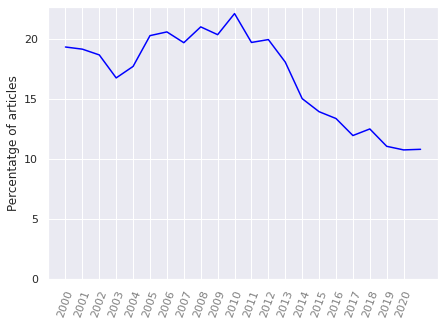

In [89]:
#plot:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)


plt.plot(cancer_2000_2020_counts_extra["year"], cancer_2000_2020_counts_extra["Percentage of articles with less than 3 authors"], label = "num authors", color="blue")

#plt.plot(cancer_authors["year"], cancer_authors["Articles per month 2020"], label = "2020", color= "crimson")

#labels

#plt.xticks(range (1,22), month_names,rotation=70);


plt.ylabel('Percentatge of articles')

plt.xticks(range (2000,2021), year_counts["year"], color="grey",rotation=70);

ax.set_ylim(ymin=0)
#ax.set_ylim(ymax=100)

#plt.title('Percentatge of articles published per month ')

#plt.legend()
plt.show();

In [64]:






month_counts['Articles per month 2000 to 2019']= round((month_counts['papers_per_month_2000_2019']/month_counts['papers_per_month_2000_2019'].sum())*100,2)

month_counts.set_index('month')
month_counts.reset_index(drop=True)

,month,papers_per_month_2000_2019,Articles per month 2000 to 2019
0,1,4065,7.92
1,2,4004,7.80
2,3,4449,8.67
3,4,4332,8.44
4,5,4451,8.67
5,6,4357,8.49
6,7,4329,8.43
7,8,4086,7.96
8,9,4280,8.34
9,10,4187,8.15


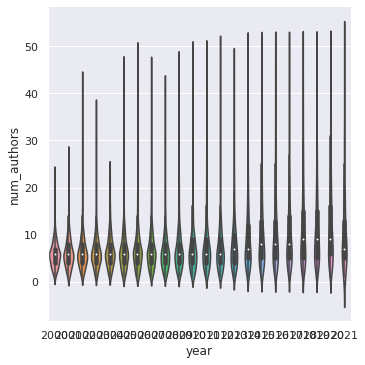

In [65]:

cancer_2000_2020_shorter_authors = cancer_2000_2020[cancer_2000_2020.num_authors <= 50]

#sns.set(rc={'figure.figsize':(19,12)})
sns.catplot(x="year",y="num_authors", data=cancer_2000_2020_shorter_authors, kind="violin")
plt.show()

Text(0, 0.5, 'Number of authors')

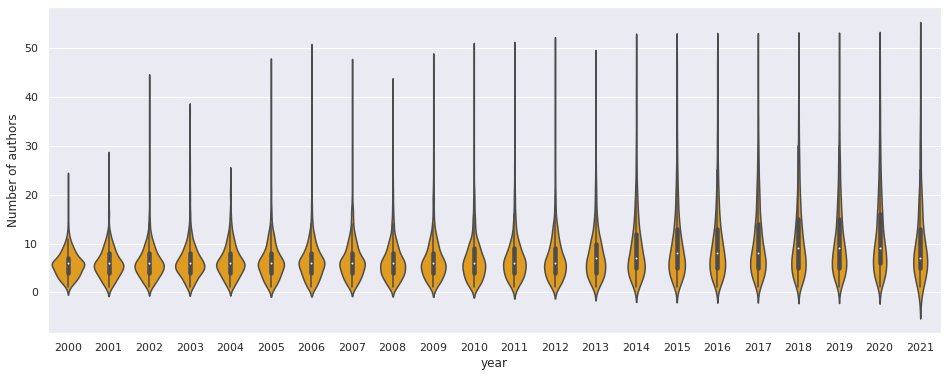

In [66]:
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x="year",y="num_authors", data=cancer_2000_2020_shorter_authors, color="orange")
plt.ylabel('Number of authors')

Text(0, 0.5, 'Number of authors')

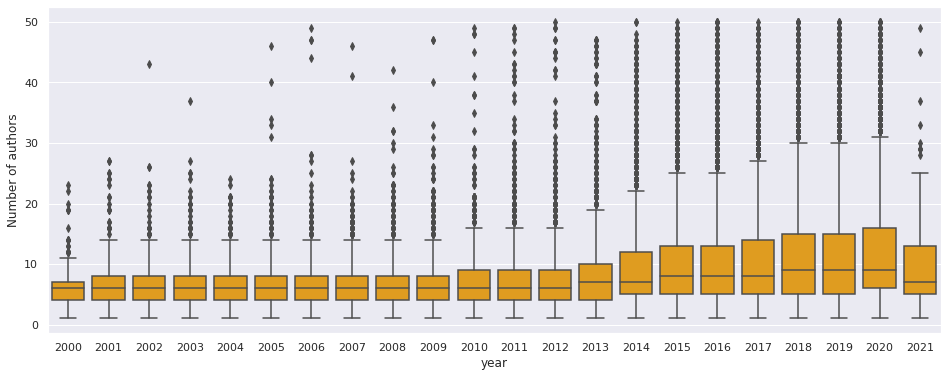

In [67]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="year",y="num_authors", data=cancer_2000_2020_shorter_authors, color="orange")
plt.ylabel('Number of authors')

In [68]:
num_authors_df=cancer_2000_2020_time.groupby("year")["num_authors"].mean().reset_index()
num_authors_df

,year,num_authors
0,2000,5.857875
1,2001,6.154516
2,2002,6.174447
3,2003,6.364842
4,2004,6.612391
5,2005,6.516901
6,2006,6.470801
7,2007,6.614558
8,2008,6.491639
9,2009,6.831668


In [69]:

num_authors=(cancer_2000_2020["num_authors"]).value_counts().reset_index()

num_authors.columns = ['num_authors', 'count']
num_authors

,num_authors,count
0,6,6107
1,5,5485
2,4,5136
3,7,4904
4,3,4263
...,...,...
236,209,1
237,114,1
238,210,1
239,242,1


<AxesSubplot:xlabel='num_authors', ylabel='count'>

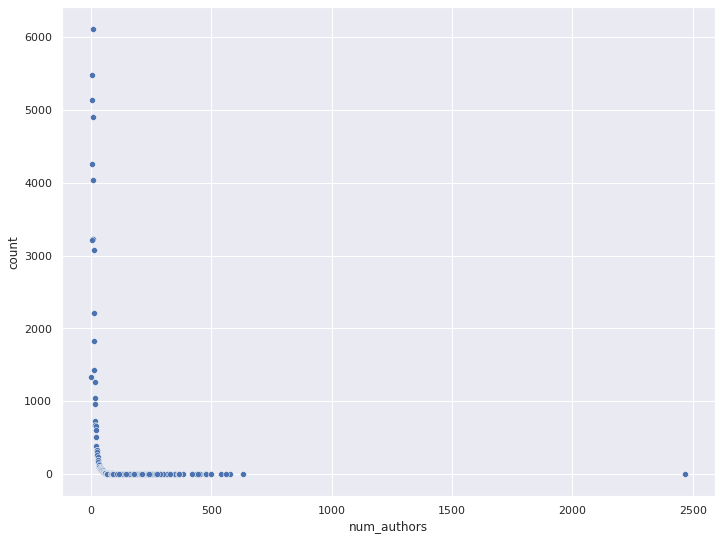

In [70]:
sns.scatterplot(data=num_authors, x="num_authors", y="count")

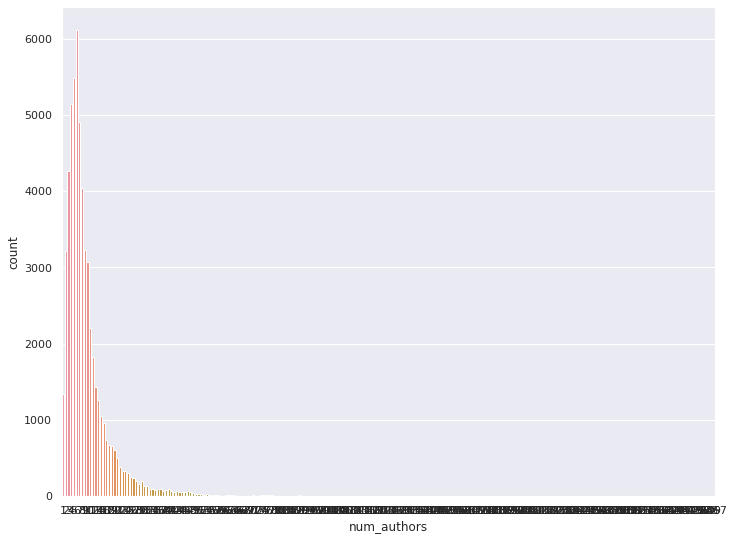

In [71]:
ax = sns.barplot(data=num_authors, x="num_authors", y="count")

<AxesSubplot:xlabel='num_authors', ylabel='Count'>

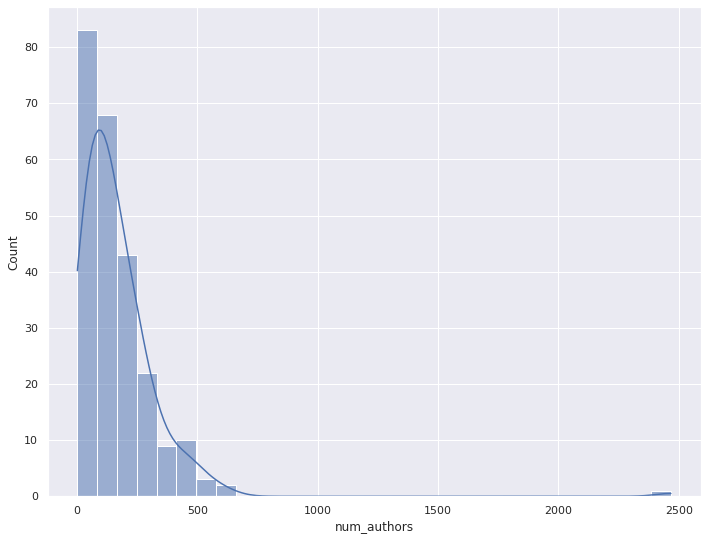

In [72]:
sns.histplot(data=num_authors, x="num_authors", kde=True, bins=30)

<AxesSubplot:xlabel='num_authors', ylabel='Count'>

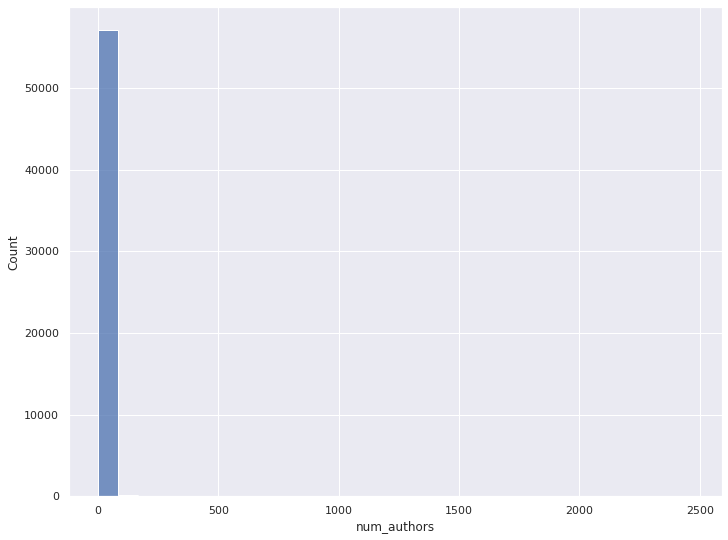

In [73]:
sns.histplot(data=cancer_2000_2020, x="num_authors",bins=30)

<AxesSubplot:xlabel='num_authors', ylabel='Count'>

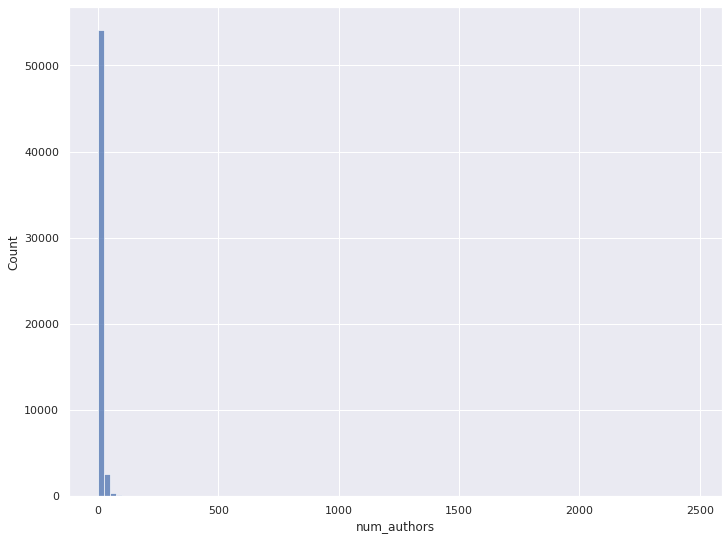

In [74]:

sns.histplot(data=cancer_2000_2020, x="num_authors",bins=100)

In [75]:
#remove outliers:




In [76]:
cancer_2000_2020_short_authors = cancer_2000_2020[cancer_2000_2020.num_authors <= 1000]

In [77]:
cancer_2000_2020_short_authors.head()


,pubmed_id,title,doi,publication_date,authors,num_authors,month,year
0,33585238,Biological and Mechanical Synergies to Deal Wi...,10.3389/fonc.2020.613669,2021-02-16,"[{'lastname': 'Mazal', 'firstname': 'Alejandro...",19,2,2021
1,33585233,Minimal Residual Disease Detection by Next-Gen...,10.3389/fonc.2020.611021,2021-02-16,"[{'lastname': 'Yao', 'firstname': 'Qiumei', 'i...",6,2,2021
2,33584915,Design and Simulation of Microfluidic Device f...,10.2478/joeb-2018-0003,2018-08-16,"[{'lastname': 'Asif', 'firstname': 'Afia', 'in...",4,8,2018
3,33584653,Proceedings From the First International Works...,10.3389/fimmu.2020.589381,2021-02-16,"[{'lastname': 'Guerrouahen', 'firstname': 'Bel...",18,2,2021
4,33579457,Liposomes embedded in layer by layer construct...,10.1016/j.msec.2020.111813,2021-02-14,"[{'lastname': 'Domínguez-Arca', 'firstname': '...",7,2,2021


In [78]:
#compute means and std for whole dataset, for articles with equal or less than 1000 authors
mean_aut=num_authors['num_authors'].mean()
std_aut=num_authors['num_authors'].std()
mean_aut_short=cancer_2000_2020_short_authors['num_authors'].mean()
std_aut_short=cancer_2000_2020_short_authors['num_authors'].std()
print(mean_aut, std_aut, mean_aut_short, std_aut_short)

165.03734439834025 194.8655162744769 10.553349486638659 16.723742076288907


<AxesSubplot:xlabel='num_authors', ylabel='Count'>

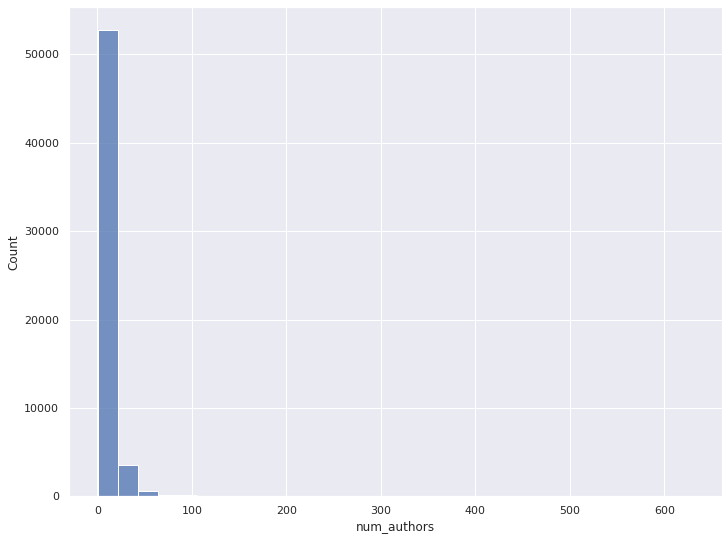

In [79]:
sns.histplot(data=cancer_2000_2020_short_authors, x="num_authors",bins=30)

In [80]:
#the mode is 6, but I get a df?
print(num_authors['num_authors'].mode())

0         1
1         2
2         3
3         4
4         5
       ... 
236     538
237     559
238     578
239     629
240    2467
Length: 241, dtype: int64


<AxesSubplot:xlabel='num_authors', ylabel='month'>

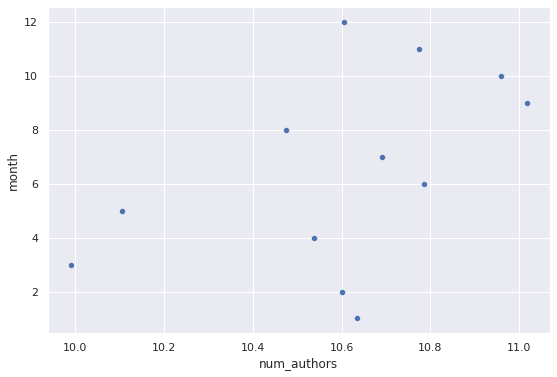

In [81]:
#for plotting num of authors: doing it for month it is strange, I know. 
num_authors=cancer_2000_2020.groupby("month")["num_authors"].mean().reset_index()
sns.set(rc={'figure.figsize':(9,6)})
sns.scatterplot(data=num_authors, x="num_authors", y="month")

<AxesSubplot:xlabel='num_authors', ylabel='year'>

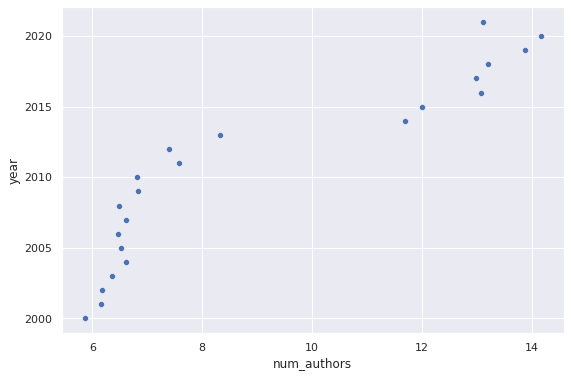

In [82]:
#for plotting num of authors:
num_authors=cancer_2000_2020.groupby("year")["num_authors"].mean().reset_index()
sns.scatterplot(data=num_authors, x="num_authors", y="year")

In [83]:
#for plotting num of authors without >2000:
num_authors=cancer_2000_2020_short_authors.groupby("year")["num_authors"].mean().reset_index()
num_authors

,year,num_authors
0,2000,5.857875
1,2001,6.154516
2,2002,6.174447
3,2003,6.364842
4,2004,6.612391
5,2005,6.516901
6,2006,6.470801
7,2007,6.614558
8,2008,6.491639
9,2009,6.831668


<AxesSubplot:xlabel='year', ylabel='num_authors'>

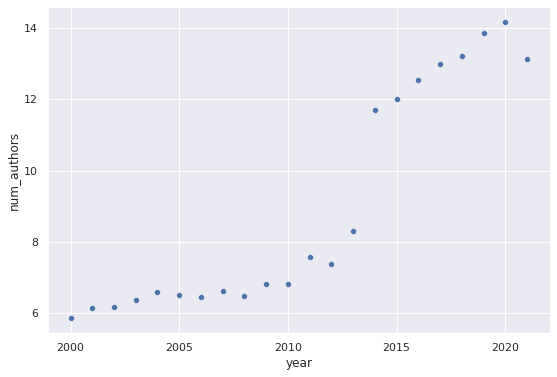

In [84]:

sns.scatterplot(data=num_authors, y="num_authors", x="year")

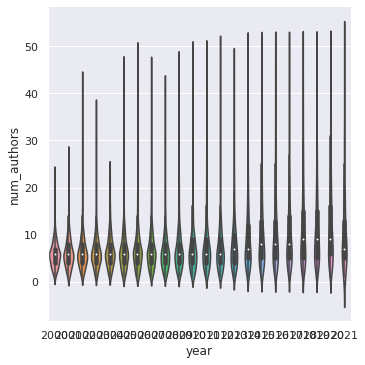

In [86]:
cancer_2000_2020_shorter_authors = cancer_2000_2020[cancer_2000_2020.num_authors <= 50]
sns.catplot(x="year",y="num_authors", data=cancer_2000_2020_shorter_authors, kind="violin")
#fig.suptitle("Author number per year removing papers with more than 50 authors", size="15", fontweight="bold",y=1.05)

#in 2021 seems to be more individual papers. Check it with the number of 1, 2 and 3 author papers.

In [78]:
cancer_2000_2020.head()

,pubmed_id,title,doi,publication_date,authors,num_authors,month,year
0,33585238,Biological and Mechanical Synergies to Deal Wi...,10.3389/fonc.2020.613669,2021-02-16,"[{'lastname': 'Mazal', 'firstname': 'Alejandro...",19,2,2021
1,33585233,Minimal Residual Disease Detection by Next-Gen...,10.3389/fonc.2020.611021,2021-02-16,"[{'lastname': 'Yao', 'firstname': 'Qiumei', 'i...",6,2,2021
2,33584915,Design and Simulation of Microfluidic Device f...,10.2478/joeb-2018-0003,2018-08-16,"[{'lastname': 'Asif', 'firstname': 'Afia', 'in...",4,8,2018
3,33584653,Proceedings From the First International Works...,10.3389/fimmu.2020.589381,2021-02-16,"[{'lastname': 'Guerrouahen', 'firstname': 'Bel...",18,2,2021
4,33579457,Liposomes embedded in layer by layer construct...,10.1016/j.msec.2020.111813,2021-02-14,"[{'lastname': 'Domínguez-Arca', 'firstname': '...",7,2,2021


In [ ]:
#generate word clouds to see the change in the words used in titles:

In [82]:
wordcloud2 = WordCloud().generate(' '.join(cancer_2000_2020['title']))

In [83]:
wordcloud2

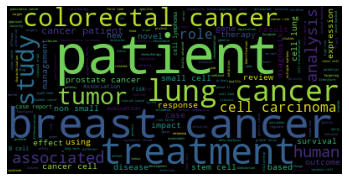

In [86]:

# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [87]:
cancer_2000_2012 = cancer_2000_2020[cancer_2000_2020.year < 2013]

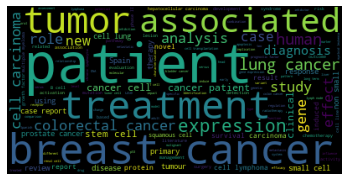

In [88]:
wordcloud2 = WordCloud().generate(' '.join(cancer_2000_2012['title']))

# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

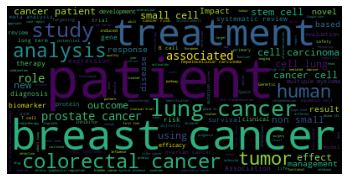

In [89]:
cancer_2013_2020 = cancer_2000_2020[cancer_2000_2020.year >= 2013]
wordcloud2 = WordCloud().generate(' '.join(cancer_2013_2020['title']))

# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

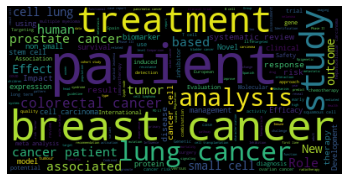

In [90]:
cancer_2018_2021 = cancer_2000_2020[cancer_2000_2020.year >= 2018]
wordcloud2 = WordCloud().generate(' '.join(cancer_2018_2021['title']))

# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

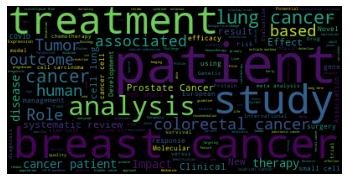

In [92]:
cancer_2020 = cancer_2000_2020[cancer_2000_2020.year >= 2020]
wordcloud2 = WordCloud().generate(' '.join(cancer_2020['title']))

# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

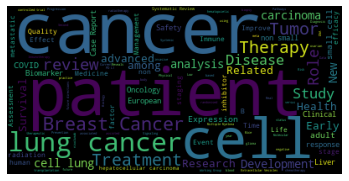

In [91]:
cancer_2021 = cancer_2000_2020[cancer_2000_2020.year >= 2021]
wordcloud2 = WordCloud().generate(' '.join(cancer_2021['title']))

# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [ ]:
#we cannot infer the rate of publishing with any confidence.
#use the last 5 years to build a prediction of number of publications:

In [98]:
cancer_2015_2021 = cancer_2000_2020[cancer_2000_2020.year >= 2015]

In [99]:
#get the year counts fot the last 5 years:
cancer_2015_2020= cancer_2015_2021[cancer_2015_2021.year < 2021]
year_counts=(cancer_2015_2020["year"]).value_counts().reset_index()
year_counts.columns = ['year', 'papers_per_year']
year_counts.sort_values("year", inplace=True)
year_counts

,year,papers_per_year
5,2015,4263
4,2016,4595
3,2017,4842
2,2018,5124
1,2019,5490
0,2020,5886


In [100]:
#calculate the slope and insersect: 
m,b = np.polyfit(year_counts["year"], year_counts["papers_per_year"], 1)

In [101]:
print(m,b)

316.6285714284979 -633764.8095236607


In [104]:
#do it manually as well:
def get_slope_intercept(x,y):
    mean_x = sum(x)/len(x)
    mean_y = sum(y)/len(y)
    #Slope
    step1 = []
    step2 = []
    for i in range(len(x)):
        step1.append((x[i]-mean_x)*(y[i]-mean_y))
        step2.append((x[i]-mean_x)**2)
    slope = sum(step1)/sum(step2)
    # Intercept
    #intercept= mean(y)-b1*mean(x)
    intercept = mean_y - (slope*mean_x)
    return slope, intercept

In [119]:
slope,intercept=get_slope_intercept(year_counts["year"], year_counts["papers_per_year"])
print(slope,intercept)

316.62857142857143 -633764.8095238095


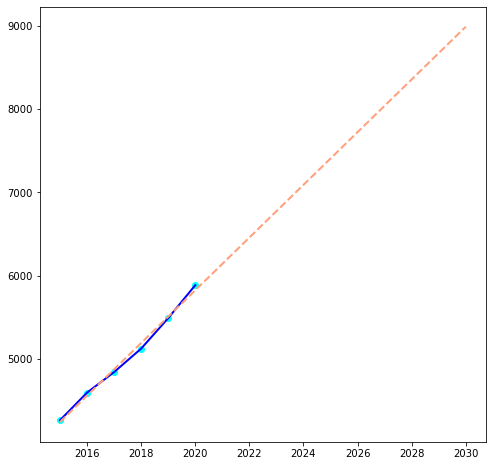

In [126]:
#add a regression line in the papers per year plot:

# your code here
#scatter plot:
fig,ax=plt.subplots(figsize=(8,8))
ax.scatter(year_counts["year"], year_counts["papers_per_year"], c="cyan")
ax.plot(year_counts["year"],year_counts["papers_per_year"], linewidth=2
            ,c="blue");

# plot regression line:
x = np.array ( [min(year_counts["year"]),2030] )
              
              
f = lambda x: slope*x + intercept
plt.plot(x,f(x), c="lightsalmon", linewidth=2, linestyle="dashed")